In [1]:
# Import necessary libraries
import pandas as pd
from transformers import pipeline
from datetime import datetime
import torch
import os
import seaborn as sns
import matplotlib.pyplot as plt


c:\Users\Lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Load the saved model
model_path = r"C:\Users\Lucas\Desktop\Analisis de sentimientos\Models\sentiment analyser.pt"
model = torch.load(model_path)

model.eval()

# Print the model to verify 
print(model)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_10124\822843898.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
# file path
reviews = r"C:\Users\Lucas\Desktop\Analisis de sentimientos\Data\DataBooks\merged_df.csv"

# Read the CSV 
df_reviews = pd.read_csv(reviews)

# View the first rows
print("First records of reviews:")
print(df_reviews.head())



First records of reviews:
        book title  book price  rating  year of publication   genre  \
0  The Woman in Me       20.93     4.5                 2023  Memoir   
1  The Woman in Me       20.93     4.5                 2023  Memoir   
2  The Woman in Me       20.93     4.5                 2023  Memoir   
3  The Woman in Me       20.93     4.5                 2023  Memoir   
4  The Woman in Me       20.93     4.5                 2023  Memoir   

                                        review title  reviewer rating  \
0   Unbelievably impressive. Her torn life on paper.                4   
1                         What a heartbreaking story                5   
2  Britney you are so invincible! You are an insp...                5   
3                               Fast Read, Sad Story                5   
4                       Buy it, it’s worth the read!                5   

                                  review description  is_verified        date  \
0  I'm only a third way in.

In [5]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   book title           890 non-null    object 
 1   book price           890 non-null    float64
 2   rating               890 non-null    float64
 3   year of publication  890 non-null    int64  
 4   genre                890 non-null    object 
 5   review title         890 non-null    object 
 6   reviewer rating      890 non-null    int64  
 7   review description   890 non-null    object 
 8   is_verified          890 non-null    bool   
 9   date                 890 non-null    object 
 10  ASIN                 890 non-null    object 
 11  year                 890 non-null    int64  
 12  month                890 non-null    int64  
 13  day                  890 non-null    int64  
 14  weekday              890 non-null    object 
dtypes: bool(1), float64(2), int64(5), object

In [ ]:
# Load the sentiment analysis model
sentiment_analyser = pipeline("sentiment-analysis", truncation=True, padding=True, max_length=128)

df_reviews['sentiment'] = df_reviews['review description'].apply(
    lambda x: sentiment_analyser(x)[0]['label'] if pd.notnull(x) else 'Neutral'
)

# Mapping
df_reviews['sentiment'] = df_reviews['sentiment'].map({'POSITIVE': 'Positive', 'NEGATIVE': 'Negative'})

# Check the first results
print(df_reviews[['review description', 'sentiment']].head())

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


                                  review description sentiment
0  I'm only a third way in. Shipped lightening fa...  Positive
1  "There have been so many times when I was scar...  Positive
2  The media could not be loaded. I personally ha...  Negative
3  I have been a fan of Britney's music since the...  Negative
4  Whether or not you’re a fan, it’s a great read...  Positive


In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   book title           890 non-null    object 
 1   book price           890 non-null    float64
 2   rating               890 non-null    float64
 3   year of publication  890 non-null    int64  
 4   genre                890 non-null    object 
 5   review title         890 non-null    object 
 6   reviewer rating      890 non-null    int64  
 7   review description   890 non-null    object 
 8   is_verified          890 non-null    bool   
 9   date                 890 non-null    object 
 10  ASIN                 890 non-null    object 
 11  year                 890 non-null    int64  
 12  month                890 non-null    int64  
 13  day                  890 non-null    int64  
 14  weekday              890 non-null    object 
 15  sentiment            890 non-null    obj

In [8]:
df_reviews.nunique()

book title              86
book price              83
rating                   9
year of publication     27
genre                   70
review title           788
reviewer rating          4
review description     860
is_verified              2
date                   238
ASIN                    87
year                    11
month                   12
day                     31
weekday                  7
sentiment                2
dtype: int64

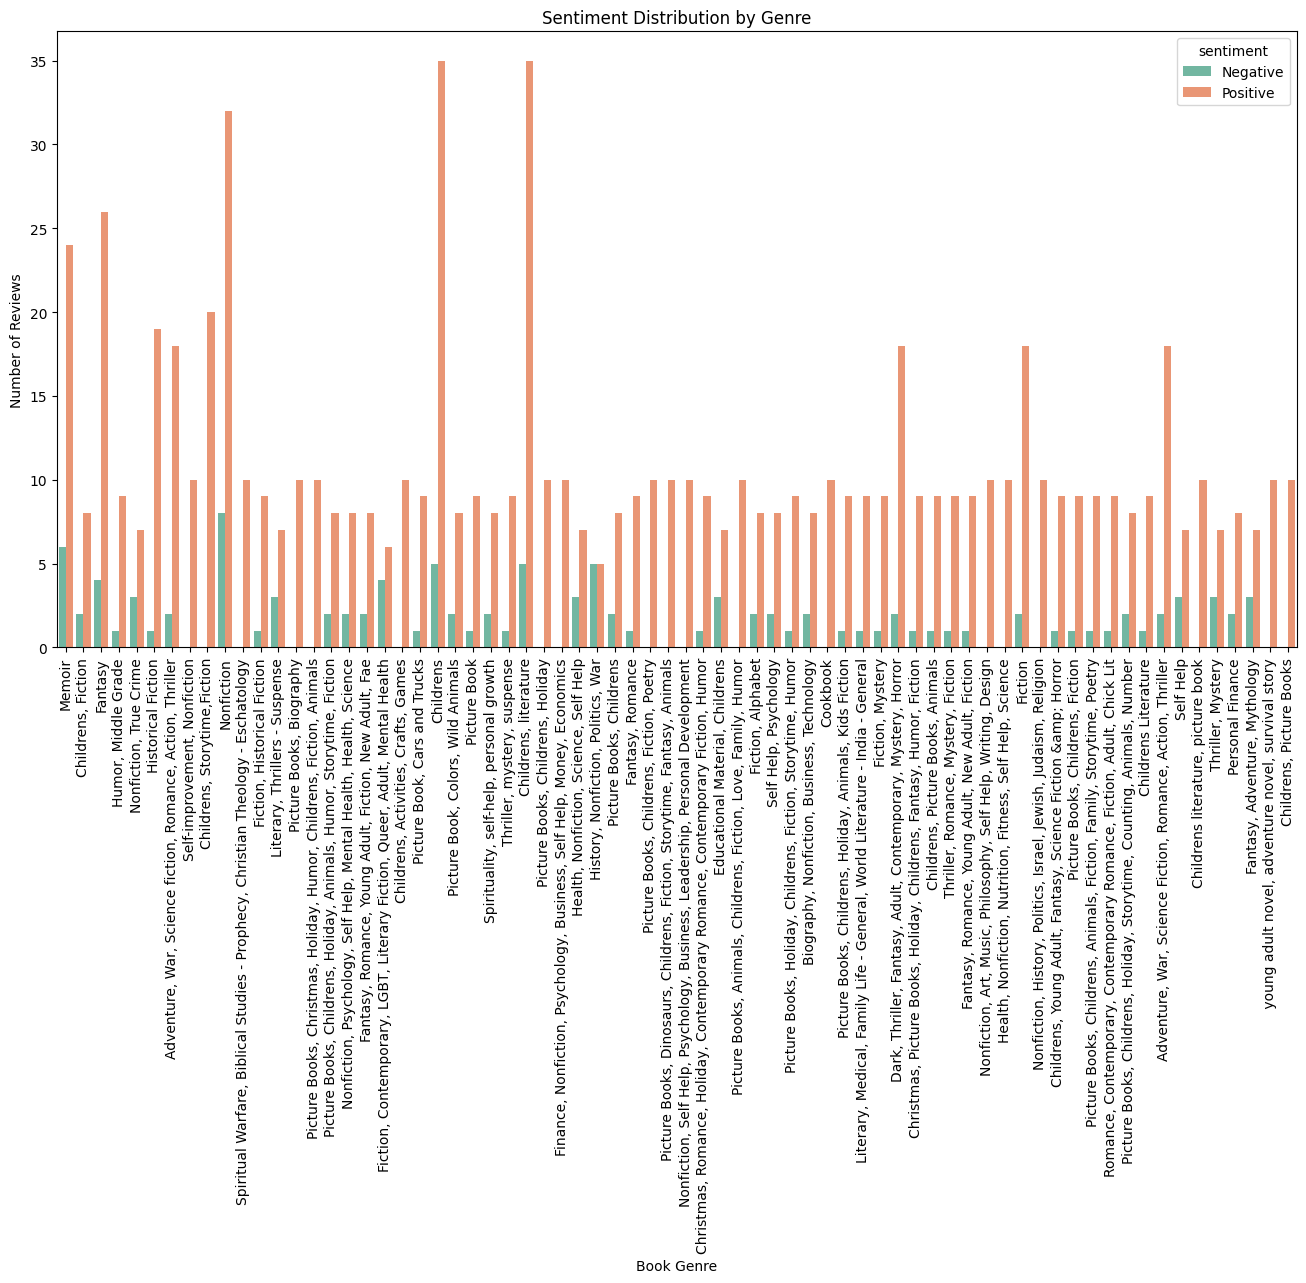

In [ ]:
# Sentiment Distribution by Genre
df_reviews['sentiment'] = df_reviews['sentiment'].astype('category')

# Create a bar plot to show the distribution of sentiments by genre
plt.figure(figsize=(16,8))
sns.countplot(x='genre', hue='sentiment', data=df_reviews, palette='Set2')
plt.title('Sentiment Distribution by Genre')
plt.xlabel('Book Genre')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_2244\3659934842.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_by_title = df_reviews.groupby(['book title', 'sentiment']).size().unstack(fill_value=0)


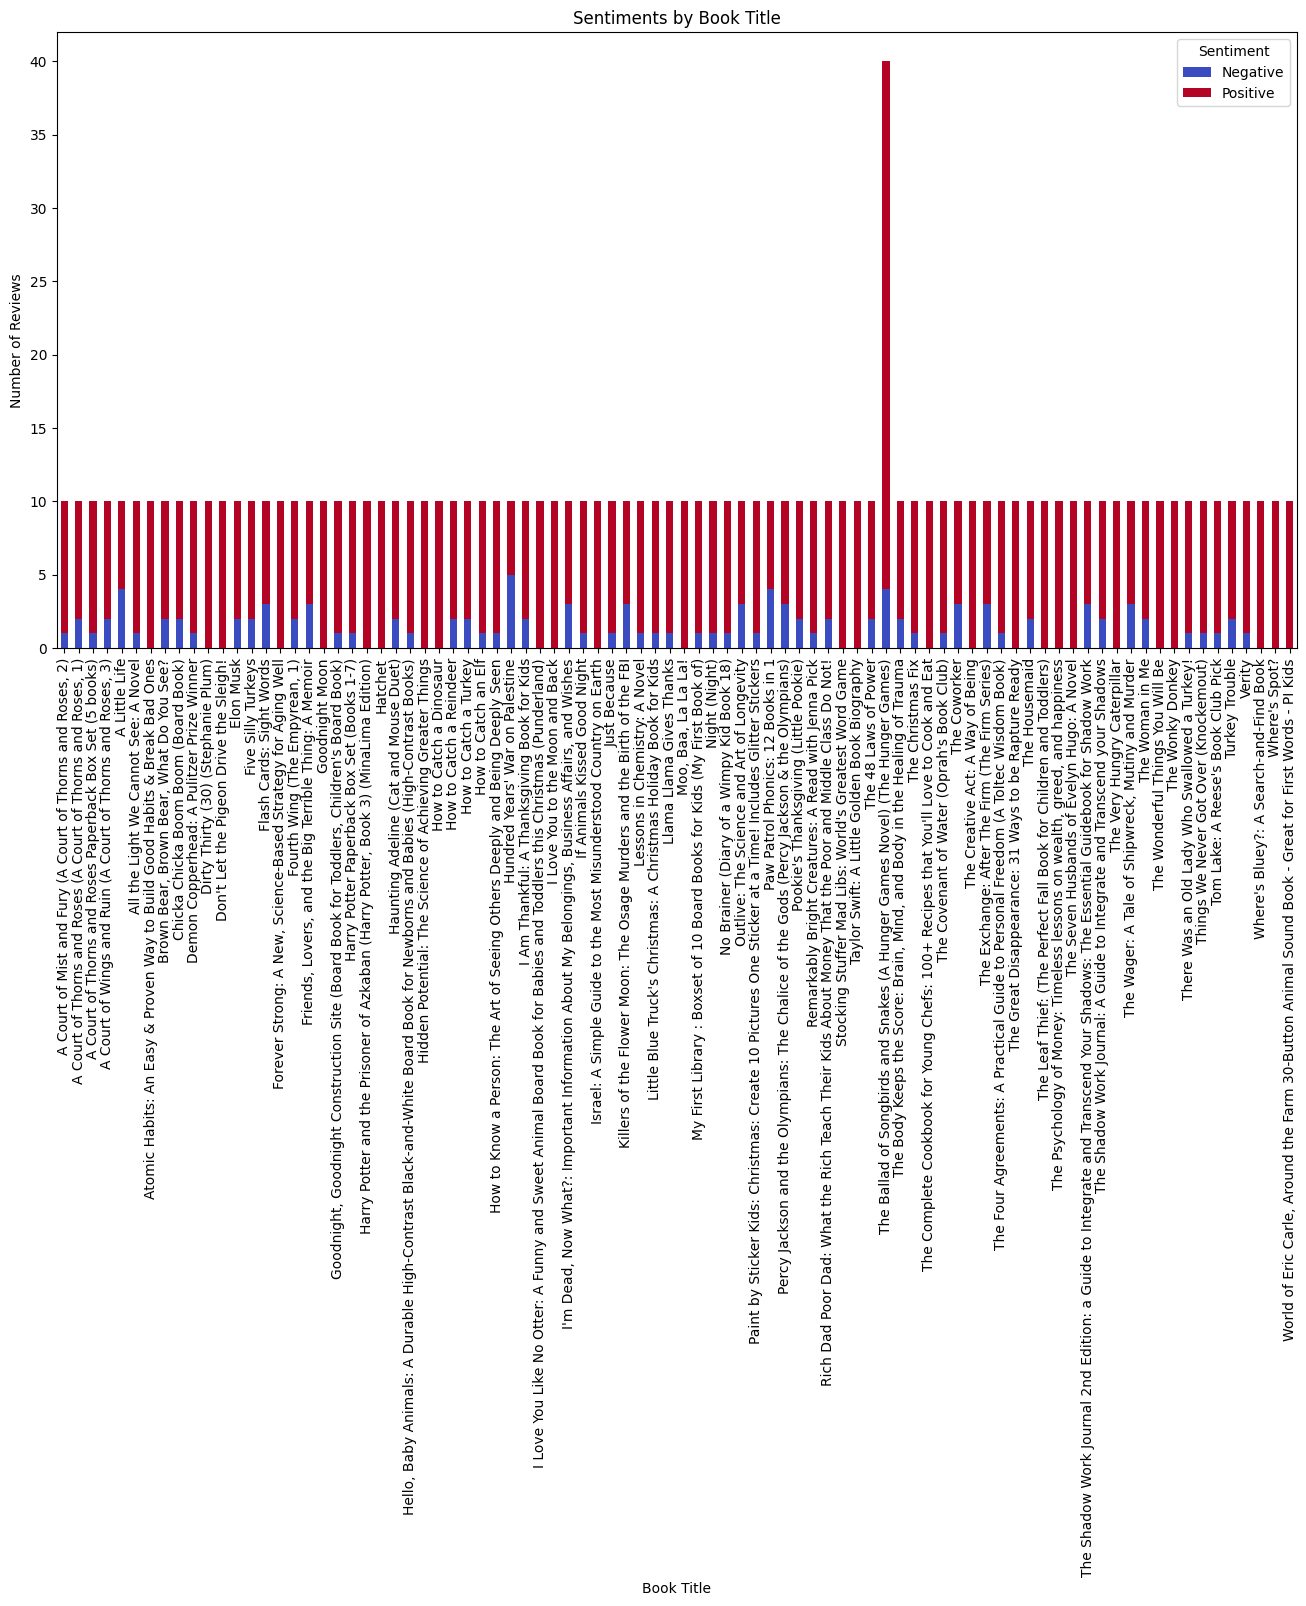

In [11]:
# Count the number of positive and negative reviews by book title
sentiment_by_title = df_reviews.groupby(['book title', 'sentiment']).size().unstack(fill_value=0)

# Plot the results
sentiment_by_title.plot(kind='bar', stacked=True, figsize=(16,8), colormap='coolwarm')
plt.title('Sentiments by Book Title')
plt.xlabel('Book Title')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.show()

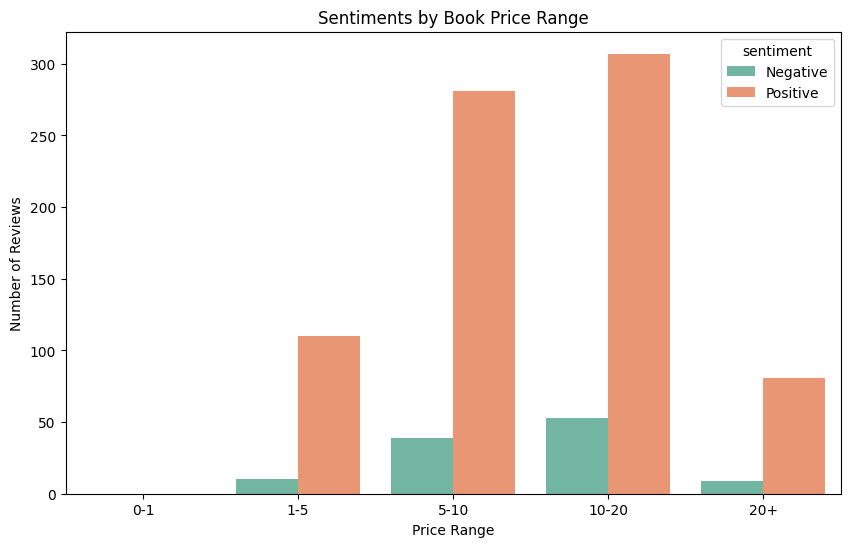

In [12]:
# Create a new column for price ranges
bins = [0, 1, 5, 10, 20, 100]
labels = ['0-1', '1-5', '5-10', '10-20', '20+']
df_reviews['price_range'] = pd.cut(df_reviews['book price'], bins=bins, labels=labels)

# Bar plot to show sentiments based on price range
plt.figure(figsize=(10,6))
sns.countplot(x='price_range', hue='sentiment', data=df_reviews, palette='Set2')
plt.title('Sentiments by Book Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Reviews')
plt.show()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_2244\140141383.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_by_month = df_reviews.groupby(['month', 'sentiment']).size().unstack(fill_value=0)


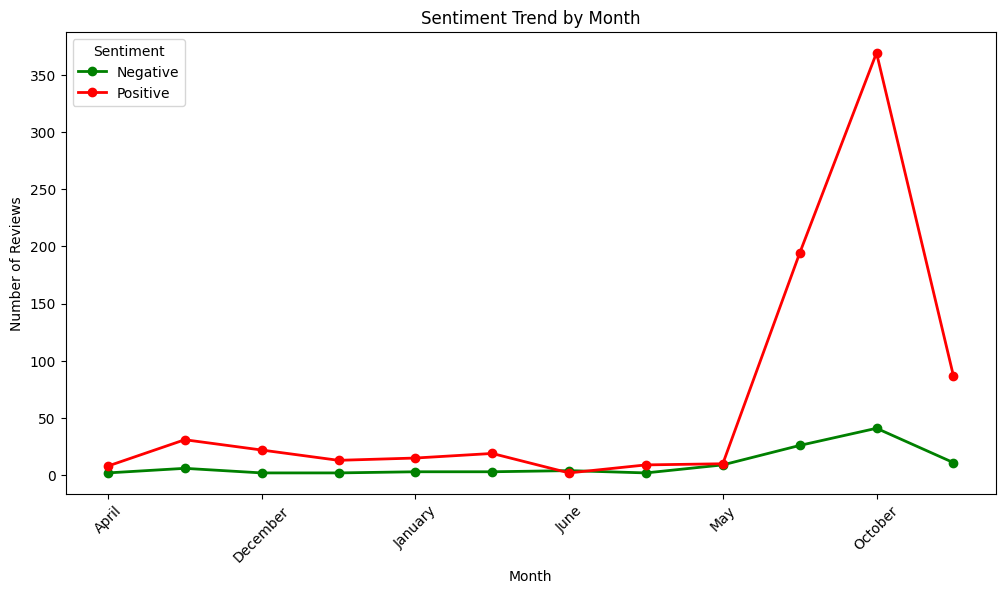

In [ ]:
# Make daketime format
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

# Create a new column for the month
df_reviews['month'] = df_reviews['date'].dt.month_name()

# Count the number of sentiments by month
sentiment_by_month = df_reviews.groupby(['month', 'sentiment']).size().unstack(fill_value=0)

# Plot the results
sentiment_by_month.plot(kind='line', marker='o', figsize=(12,6), color=['green', 'red'], linewidth=2)
plt.title('Sentiment Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

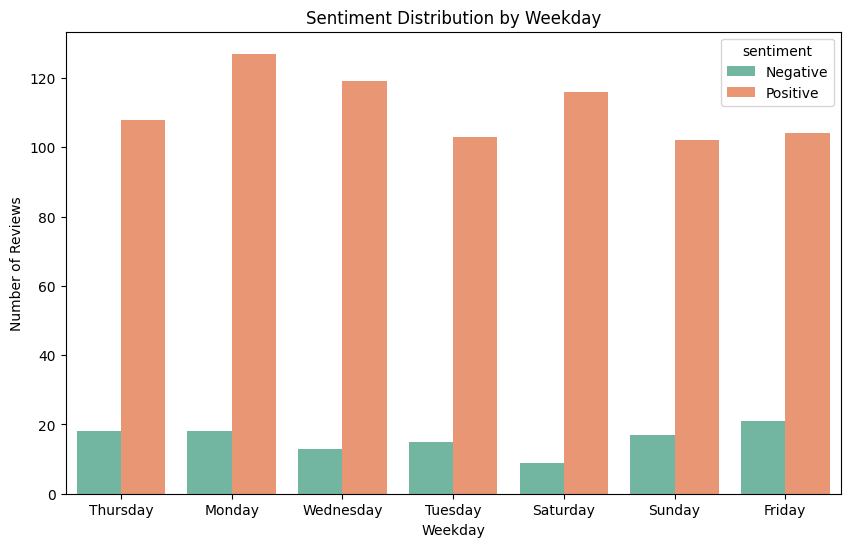

In [ ]:
# Sentiment Distibution by Weekday
plt.figure(figsize=(10,6))
sns.countplot(x='weekday', hue='sentiment', data=df_reviews, palette='Set2')
plt.title('Sentiment Distribution by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Reviews')
plt.show()

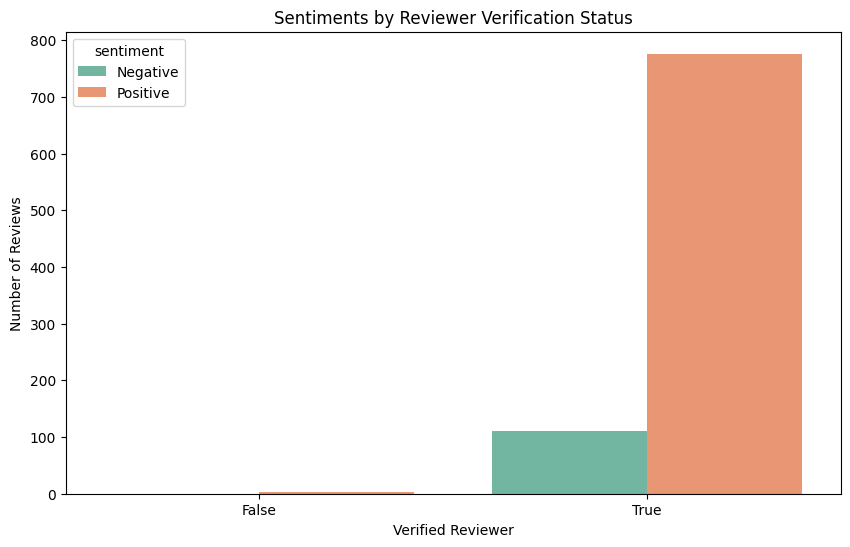

In [15]:
# Count positive and negative reviews based on the verification status
plt.figure(figsize=(10,6))
sns.countplot(x='is_verified', hue='sentiment', data=df_reviews, palette='Set2')
plt.title('Sentiments by Reviewer Verification Status')
plt.xlabel('Verified Reviewer')
plt.ylabel('Number of Reviews')
plt.show()

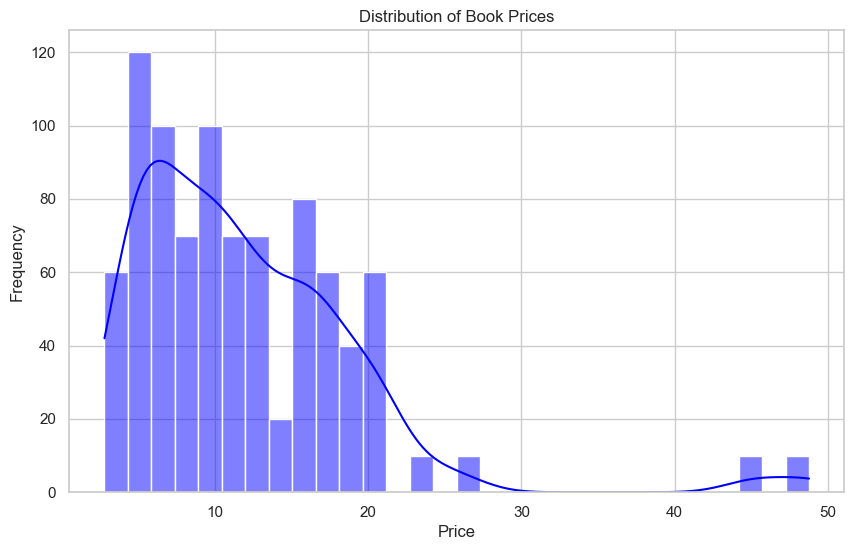

In [ ]:

sns.set(style="whitegrid")

# Distribution of book prices
plt.figure(figsize=(10, 6))
sns.histplot(df_reviews['book price'], kde=True, color='blue', bins=30)
plt.title('Distribution of Book Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

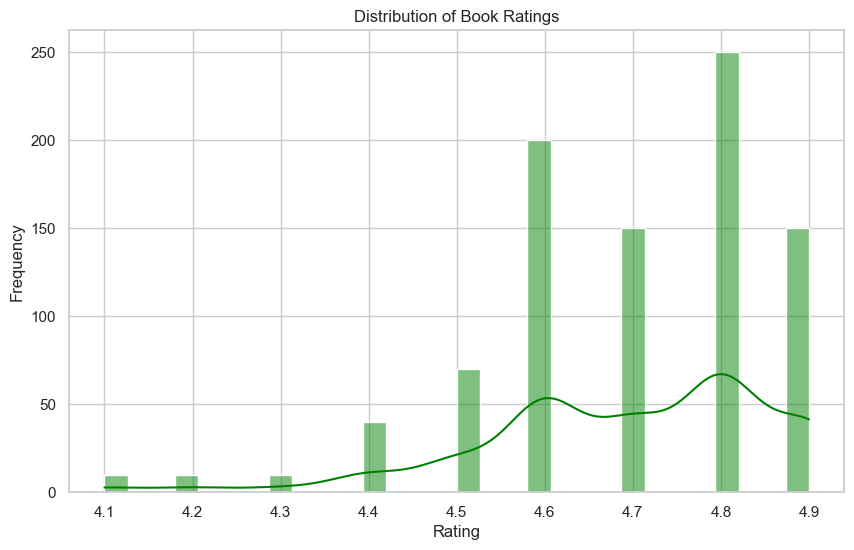

In [17]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_reviews['rating'], kde=True, color='green', bins=30)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

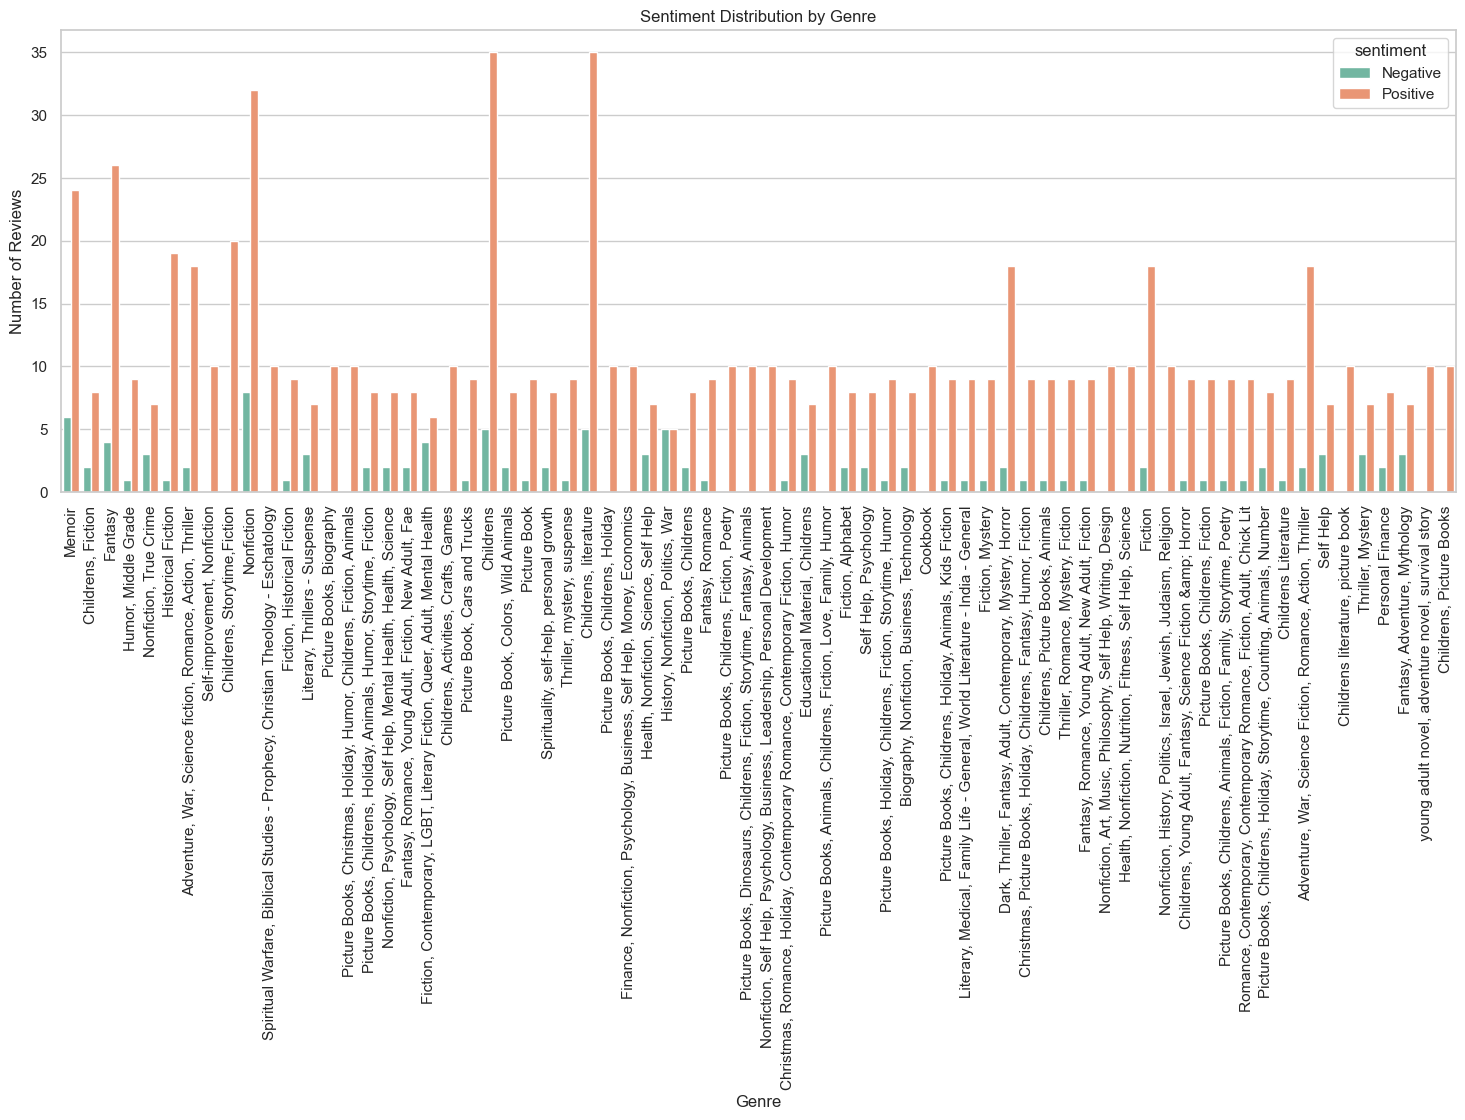

In [20]:
# Sentiment Distribution by Genre
plt.figure(figsize=(18, 6))
sns.countplot(x='genre', hue='sentiment', data=df_reviews, palette='Set2')
plt.title('Sentiment Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()

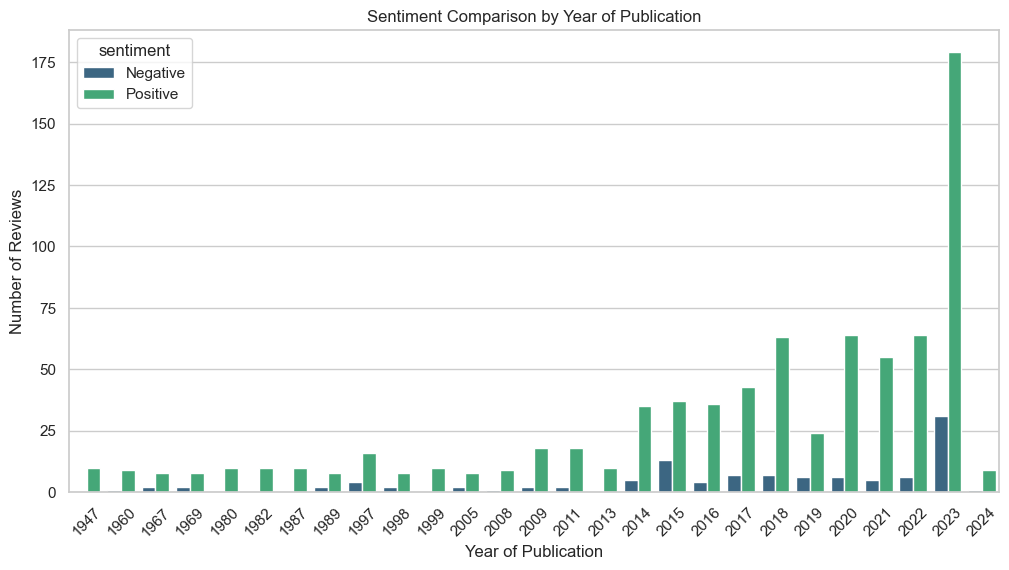

In [21]:
# Sentiment Comparison by Year of Publication
plt.figure(figsize=(12, 6))
sns.countplot(x='year of publication', hue='sentiment', data=df_reviews, palette='viridis')
plt.title('Sentiment Comparison by Year of Publication')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

In [22]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   book title           890 non-null    object        
 1   book price           890 non-null    float64       
 2   rating               890 non-null    float64       
 3   year of publication  890 non-null    int64         
 4   genre                890 non-null    object        
 5   review title         890 non-null    object        
 6   reviewer rating      890 non-null    int64         
 7   review description   890 non-null    object        
 8   is_verified          890 non-null    bool          
 9   date                 890 non-null    datetime64[ns]
 10  ASIN                 890 non-null    object        
 11  year                 890 non-null    int64         
 12  month                890 non-null    object        
 13  day                  890 non-null  

In [23]:
df_reviews.nunique()

book title              86
book price              83
rating                   9
year of publication     27
genre                   70
review title           788
reviewer rating          4
review description     860
is_verified              2
date                   238
ASIN                    87
year                    11
month                   12
day                     31
weekday                  7
sentiment                2
price_range              4
dtype: int64

In [7]:
# Average rating
average_rating = df_reviews['rating'].mean()
print(f"Average Rating: {average_rating:.1f}")

Average Rating: 4.7


In [25]:
# Create the 'is_positive' column, where True is positive and False is non-positive
df_reviews['is_positive'] = df_reviews['sentiment'] == 'Positive'

# Calculate the percentage of positive reviews
percentage_positive = (df_reviews['is_positive'].mean()) * 100
print(f"Percentage of Positive Sentiments: {percentage_positive:.2f}%")


Percentage of Positive Sentiments: 87.53%


In [26]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   book title           890 non-null    object        
 1   book price           890 non-null    float64       
 2   rating               890 non-null    float64       
 3   year of publication  890 non-null    int64         
 4   genre                890 non-null    object        
 5   review title         890 non-null    object        
 6   reviewer rating      890 non-null    int64         
 7   review description   890 non-null    object        
 8   is_verified          890 non-null    bool          
 9   date                 890 non-null    datetime64[ns]
 10  ASIN                 890 non-null    object        
 11  year                 890 non-null    int64         
 12  month                890 non-null    object        
 13  day                  890 non-null  

In [27]:
# Total reviews by genre
reviews_by_genre = df_reviews.groupby('genre')['review description'].count().reset_index()
reviews_by_genre.rename(columns={'review description': 'total_reviews'}, inplace=True)
print(reviews_by_genre)

                                                genre  total_reviews
0    young adult novel, adventure novel, survival ...             10
1   Adventure, War, Science Fiction, Romance, Acti...             20
2   Adventure, War, Science fiction, Romance, Acti...             20
3         Biography, Nonfiction, Business, Technology             10
4                                           Childrens             40
..                                                ...            ...
65  Spiritual Warfare, Biblical Studies - Prophecy...             10
66           Spirituality, self-help, personal growth             10
67                                  Thriller, Mystery             10
68                Thriller, Romance, Mystery, Fiction             10
69                        Thriller, mystery, suspense             10

[70 rows x 2 columns]


In [ ]:
# Review trends by date
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

# Group by month
monthly_reviews = df_reviews.groupby(df_reviews['date'].dt.to_period('M'))['review description'].count().reset_index()
monthly_reviews.rename(columns={'review description': 'total_reviews'}, inplace=True)
print(monthly_reviews)

       date  total_reviews
0   2010-02              1
1   2010-06              1
2   2014-08              1
3   2014-09              1
4   2015-03              1
..      ...            ...
61  2023-07             14
62  2023-08             30
63  2023-09             91
64  2023-10            402
65  2023-11            190

[66 rows x 2 columns]


In [ ]:
# Folder path to save the files
output_folder = r"C:\Users\Lucas\Desktop\Analisis de sentimientos\Additional Results"

# Create the folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Save reviews by genre
reviews_by_genre.to_csv(os.path.join(output_folder, "Reviews_by_Genre.csv"), index=False)

# Save monthly trends
monthly_reviews.to_csv(os.path.join(output_folder, "Monthly_Reviews.csv"), index=False)

print("Files successfully saved in:", output_folder)

Files successfully saved in: C:\Users\Lucas\Desktop\Analisis de sentimientos\Resultados adicionales


In [ ]:
# Path where 
output_path = r"C:\Users\Lucas\Desktop\Analisis de sentimientos\Data\DataBooks\df_reviews.csv"

# Create the folder
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Save 
df_reviews.to_csv(output_path, index=False, encoding='utf-8')

print(f"The CSV file has been successfully saved at: {output_path}")

The CSV file has been successfully saved at: C:\Users\Lucas\Desktop\Analisis de sentimientos\Data\DataBooks\df_reviews.csv
